In [31]:
#Importing Libraries:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from scipy import stats
import statsmodels.api as sma

In [32]:
df = pd.read_csv('E:\Test trail\Data\mobile_price_data.csv')
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [34]:
for col in df.columns:
    print(col, df[col].unique())
    print('\n')

mobile_name ['Realme Narzo 10A (So White, 32 GB)' 'Realme Narzo 10A (So Blue, 32 GB)'
 'Realme Narzo 10A (So Blue, 64 GB)' 'Realme Narzo 10A (So White, 64 GB)'
 'Realme Narzo 10 (That Green, 128 GB)'
 'Realme Narzo 10 (That White, 128 GB)'
 'Realme 5 Pro (Crystal Green, 64 GB)'
 'Realme 5 Pro (Crystal Green, 128 GB)'
 'Realme 5 Pro (Sparkling Blue, 128 GB)'
 'Realme 5 Pro (Sparkling Blue, 64 GB)'
 'Realme X2 Pro (Lunar White, 256 GB)'
 'Realme X2 Pro (Neptune Blue, 256 GB)'
 'Realme X2 Pro (Neptune Blue, 128 GB)'
 'Realme X2 Pro (Lunar White, 128 GB)' 'Realme 2 Pro (Black Sea, 128 GB)'
 'Realme XT (Pearl Blue, 64 GB)' 'Realme XT (Pearl White, 64 GB)'
 'Realme X50 Pro (Rust Red, 128 GB)' 'Realme X50 Pro (Moss Green, 128 GB)'
 'Realme X50 Pro (Moss Green, 256 GB)' 'Realme C3 (Frozen Blue, 32 GB)'
 'Realme 6 (Comet White, 128 GB)'
 'Realme 6 Pro (Lightning Orange, 128 GB)'
 'Realme 6 Pro (Lightning Blue, 128 GB)'
 'Realme C2 (Diamond Black, 32 GB)' 'Realme C2 (Diamond Blue, 32 GB)'
 'Real

In [35]:
df._get_numeric_data()

""
0
1
2
3
4
...
454
455
456
457


In [36]:
# Maintain a copy of initial data as such for future reference and comparison, if needed
initial_df = df

In [37]:
status = dict(zip(df.columns,list([0]*len(df.columns))))

In [38]:
status

{'mobile_name': 0,
 'mobile_price': 0,
 'mobile_color': 0,
 'dual_sim': 0,
 'disp_size': 0,
 'resolution': 0,
 'os': 0,
 'num_cores': 0,
 'mp_speed': 0,
 'int_memory': 0,
 'ram': 0,
 'p_cam': 0,
 'f_cam': 0,
 'network': 0,
 'bluetooth': 0,
 'battery_power': 0,
 'mob_width': 0,
 'mob_height': 0,
 'mob_depth': 0,
 'mob_weight': 0}

In [39]:
def numericize(df,col):
    return pd.to_numeric(df[col].str.replace('[a-zA-Z]','',regex=True))

In [40]:
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [41]:
df['mp_speed'] = numericize(df,'mp_speed')
df['mp_speed'].unique()
status['mp_speed'] = 1

df['int_memory'] = numericize(df,'int_memory')
df['int_memory'].unique()
status['int_memory'] = 1

df['ram'] = numericize(df,'ram')
df['ram'].unique()
status['ram'] = 1

df['battery_power'] = numericize(df,'battery_power')
df['battery_power'].unique()
status['battery_power'] = 1

df['mob_width'] = numericize(df,'mob_width')
df['mob_width'].unique()
status['mob_width'] = 1

df['mob_height'] = numericize(df,'mob_height')
df['mob_height'].unique()
status['mob_height'] = 1

df['mob_depth'] = numericize(df,'mob_depth')
df['mob_depth'].unique()
status['mob_depth'] = 1

df['mob_weight'] = numericize(df,'mob_weight')
df['mob_weight'].unique()
status['mob_weight'] = 1

df._get_numeric_data()

,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,2.0,32,3,5000,75.0,164.4,8.95,195.0
1,2.0,32,3,5000,75.0,164.4,8.95,195.0
2,2.0,64,4,5000,75.0,164.4,8.95,195.0
3,2.0,64,4,5000,75.0,164.4,8.95,195.0
4,2.0,128,4,5000,75.4,164.4,9.00,199.0
...,...,...,...,...,...,...,...,...
454,2.5,32,3,3180,73.1,150.5,7.70,143.0
455,2.5,16,2,3180,73.1,150.5,7.70,143.0
456,2.0,64,4,3400,75.3,156.0,7.80,158.0
457,2.1,128,4,4020,76.1,162.0,8.30,188.0


In [42]:
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.4,164.4,9.00,199.0


In [43]:
# Clean the mobile price column

def edit_numericize(df,col,strs_to_remove):
    processed = df[col]
    for string in strs_to_remove:
        processed = processed.str.replace(string,'',regex=False)
    return pd.to_numeric(processed)

df['mobile_price'] = edit_numericize(df,'mobile_price',['₹',','])
df['mobile_price'].unique()
status['mobile_price'] = 1

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\3769497296.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\3769497296.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask=mask, annot=True)


<AxesSubplot: >

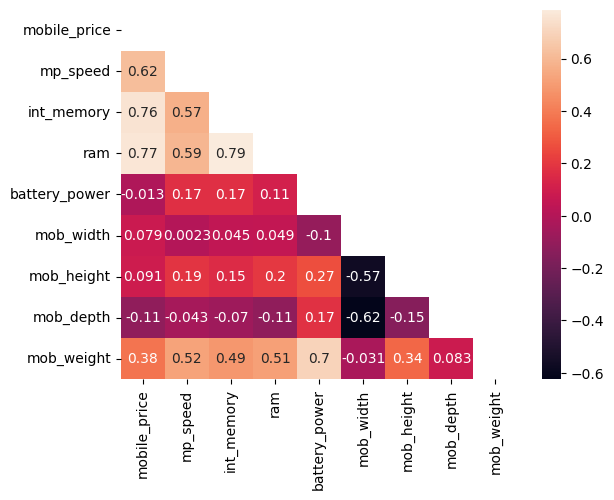

In [44]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(),mask=mask, annot=True)

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\536688151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


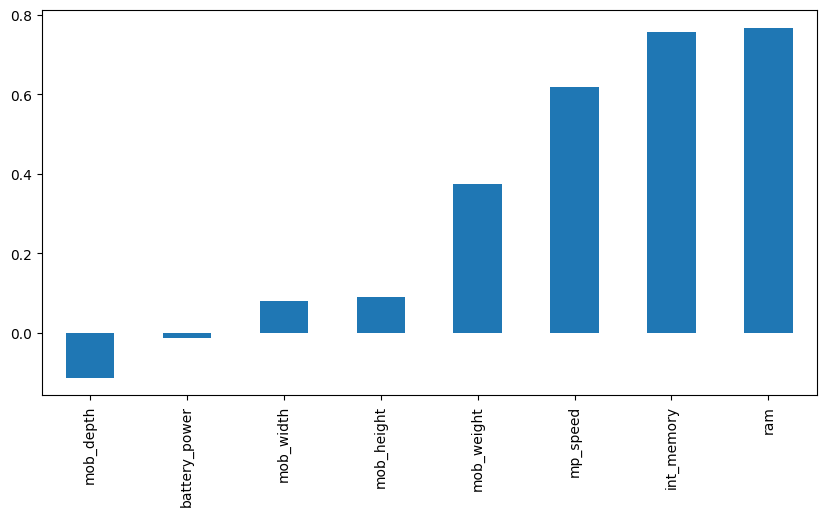

In [45]:
def plot_correlation_with_col(df, col):
    sorted_corr = df.corr().sort_values(col)[col][:-1]
    sorted_corr.plot(kind='bar',figsize = (10,5))
plot_correlation_with_col(df,'mobile_price')

In [46]:
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)",8999,So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
2,"Realme Narzo 10A (So Blue, 64 GB)",9999,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
3,"Realme Narzo 10A (So White, 64 GB)",9999,So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
4,"Realme Narzo 10 (That Green, 128 GB)",11999,That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.4,164.4,9.00,199.0


In [47]:
def replace_regex_numericize(df,col,chars_to_remove):
    processed = df[col]
    for char in chars_to_remove:
        processed = processed.str.replace(char,'',regex=True)
    return pd.to_numeric(processed)
# edit_numericize
df['disp_size'] = replace_regex_numericize(df,'disp_size',[' cm .*'])
df['disp_size'].unique()
status['disp_size'] = 1

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\536688151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


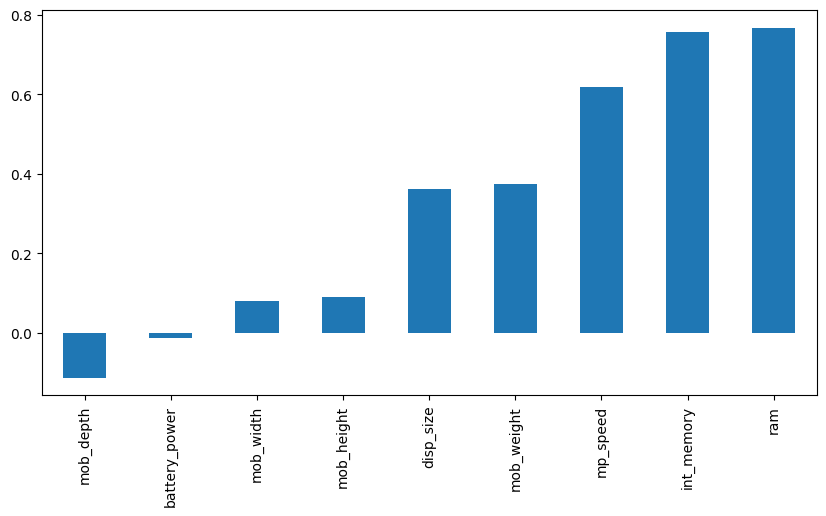

In [48]:
plot_correlation_with_col(df,'mobile_price')

In [49]:
def replace_regex(df,col,chars_to_remove):
    processed = df[col]
    for char in chars_to_remove:
        processed = processed.str.replace(char,'',regex=True)
    return processed

df['mobile_name_brand'] = replace_regex(df, 'mobile_name', [' \(.*\)'])
df['mobile_name_brand'].unique()

array(['Realme Narzo 10A', 'Realme Narzo 10', 'Realme 5 Pro',
       'Realme X2 Pro', 'Realme 2 Pro', 'Realme XT', 'Realme X50 Pro',
       'Realme C3', 'Realme 6', 'Realme 6 Pro', 'Realme C2', 'Realme 5s',
       'Realme X2', 'Realme X3', 'Realme X3 SuperZoom', 'Realme 3',
       'Redmi 8', 'Redmi K20 Pro', 'Redmi Note 9 Pro', 'Mi A3',
       'Redmi Note 7 Pro', 'Mi Mix 2', 'Redmi K20', 'Redmi Y2',
       'Redmi Note 6 Pro', 'Mi A2', 'Mi 10', 'Redmi Note 5 Pro', 'MI3',
       'Redmi 8A Dual', 'Redmi Note 8', 'Redmi Note 4',
       'Redmi Note 9 Pro Max', 'Redmi 8A', 'Redmi Go', 'Redmi Note 7S',
       'Redmi 7A', 'Redmi Note 7', 'Redmi 6', 'Redmi Y3', 'Redmi Y1',
       'Vivo Y12', 'Vivo U10', 'Vivo Y11', 'Vivo Z1x', 'Vivo Y15',
       'Vivo S1 Pro', 'Vivo Y91i', 'Vivo Y50', 'Vivo Z1Pro', 'Vivo Y19',
       'Vivo V19', 'Vivo V17', 'Vivo S1', 'Vivo V15 Pro', 'Vivo Y17',
       'Vivo V17Pro', 'Vivo V11 Pro', 'Vivo NEX', 'Vivo Y81',
       'Vivo V9 Youth', 'Vivo V15', 'Vivo Y93', 'Vivo Y

In [50]:
df['mobile_name_brand_short'] = replace_regex(df, 'mobile_name', [' .*'])
df['mobile_name_brand_short'].unique()

array(['Realme', 'Redmi', 'Mi', 'MI3', 'Vivo', 'Samsung', 'Infinix',
       'POCO', 'OPPO'], dtype=object)

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\536688151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


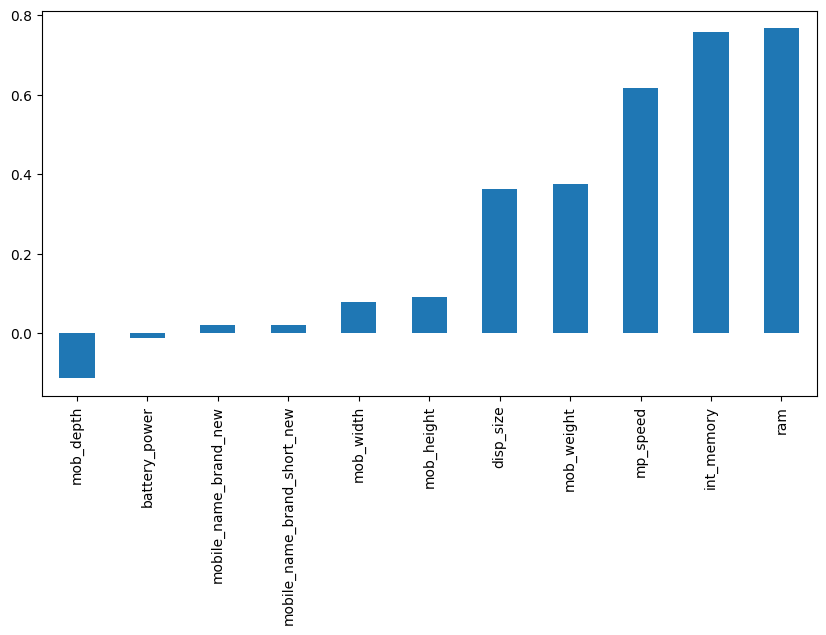

In [51]:
def convert_words_to_num(df,cat_col):
    return df[cat_col].astype('category').cat.codes
df['mobile_name_brand_new'] = convert_words_to_num(df,'mobile_name_brand')
df['mobile_name_brand_short_new'] = convert_words_to_num(df,'mobile_name_brand')

plot_correlation_with_col(df,'mobile_price')

In [53]:
status['mobile_name'] = 1
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,...,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,mobile_name_brand,mobile_name_brand_short,mobile_name_brand_new,mobile_name_brand_short_new
0,"Realme Narzo 10A (So White, 32 GB)",8999,So White,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,32,...,Yes,5000,75.0,164.4,8.95,195.0,Realme Narzo 10A,Realme,58,58
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,So Blue,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,32,...,Yes,5000,75.0,164.4,8.95,195.0,Realme Narzo 10A,Realme,58,58
2,"Realme Narzo 10A (So Blue, 64 GB)",9999,So Blue,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,64,...,Yes,5000,75.0,164.4,8.95,195.0,Realme Narzo 10A,Realme,58,58
3,"Realme Narzo 10A (So White, 64 GB)",9999,So White,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,64,...,Yes,5000,75.0,164.4,8.95,195.0,Realme Narzo 10A,Realme,58,58
4,"Realme Narzo 10 (That Green, 128 GB)",11999,That Green,Dual Sim,16.51,1600 x 720 Pixels,Android 10,Octa Core,2.0,128,...,Yes,5000,75.4,164.4,9.00,199.0,Realme Narzo 10,Realme,57,57


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mobile_name                  459 non-null    object 
 1   mobile_price                 459 non-null    int64  
 2   mobile_color                 459 non-null    object 
 3   dual_sim                     459 non-null    object 
 4   disp_size                    459 non-null    float64
 5   resolution                   459 non-null    object 
 6   os                           459 non-null    object 
 7   num_cores                    459 non-null    object 
 8   mp_speed                     459 non-null    float64
 9   int_memory                   459 non-null    int64  
 10  ram                          459 non-null    int64  
 11  p_cam                        459 non-null    object 
 12  f_cam                        459 non-null    object 
 13  network             

In [55]:
df['mobile_color_cat'] = convert_words_to_num(df,'mobile_color')
df['dual_sim_cat'] = convert_words_to_num(df,'dual_sim')
df['resolution_cat'] = convert_words_to_num(df,'resolution')
df['os_cat'] = convert_words_to_num(df,'os')
df['num_cores_cat'] = convert_words_to_num(df,'num_cores')
df['f_cam_cat'] = convert_words_to_num(df,'f_cam')
df['network_cat'] = convert_words_to_num(df,'network')

status['mobile_color'] = 1
status['dual_sim'] = 1
status['resolution'] = 1
status['os'] = 1
status['num_cores'] = 1
status['f_cam'] = 1
status['network'] = 1

In [56]:
status

{'mobile_name': 1,
 'mobile_price': 1,
 'mobile_color': 1,
 'dual_sim': 1,
 'disp_size': 1,
 'resolution': 1,
 'os': 1,
 'num_cores': 1,
 'mp_speed': 1,
 'int_memory': 1,
 'ram': 1,
 'p_cam': 0,
 'f_cam': 1,
 'network': 1,
 'bluetooth': 0,
 'battery_power': 1,
 'mob_width': 1,
 'mob_height': 1,
 'mob_depth': 1,
 'mob_weight': 1}

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\536688151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


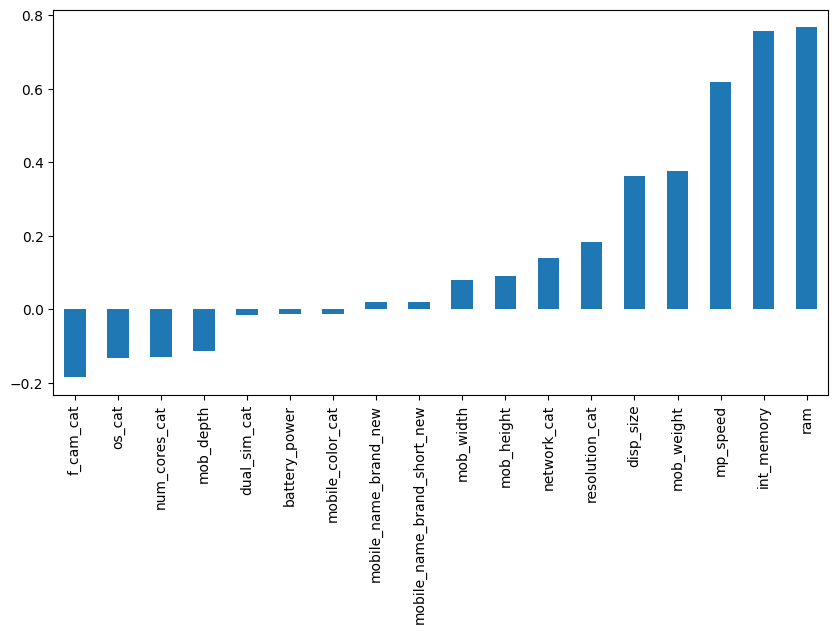

In [57]:
plot_correlation_with_col(df,'mobile_price')

In [58]:
# Some columns seem to have values which are in words, but represents a number. Convert them

df['dual_sim'].unique()

array(['Dual Sim', 'Single Sim'], dtype=object)

In [59]:
df['dual_sim_ord'] = df['dual_sim'].replace('Dual Sim',2).replace('Single Sim',1)
df['num_cores'].unique()

array(['Octa Core', 'Quad Core', 'Single Core'], dtype=object)

In [60]:
df['num_cores_ord'] = df['num_cores'].replace('Octa Core',8).replace('Quad Core',4).replace('Single Core',1)

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\536688151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


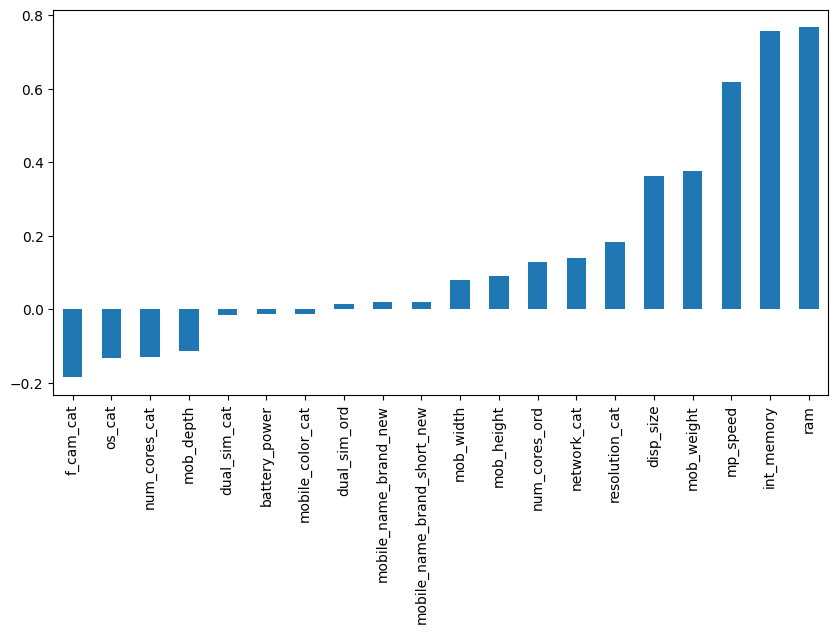

In [61]:
plot_correlation_with_col(df,'mobile_price')

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\73056391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


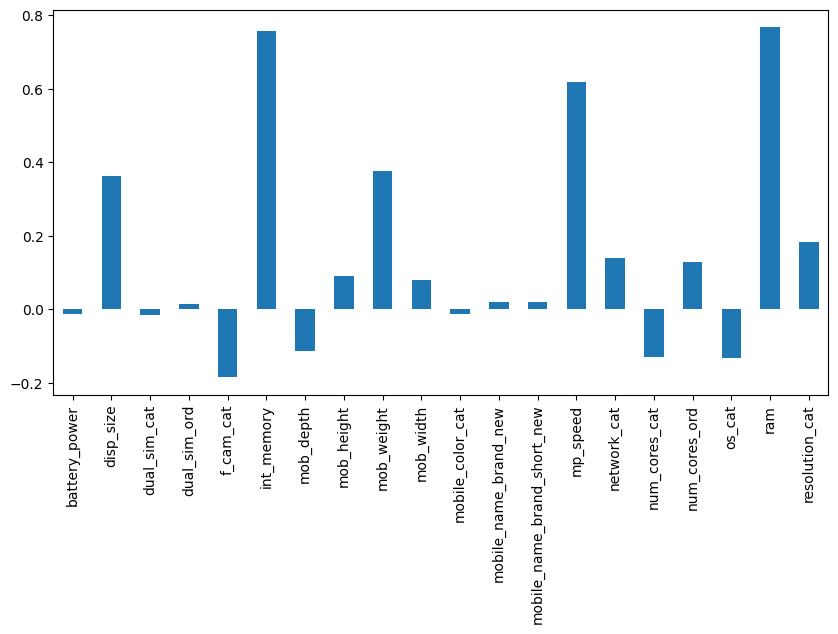

In [62]:
def plot_grouped_correlation_with_col(df, col):
    sorted_corr = df.corr().sort_values(col)[col][:-1]
    sorted_corr.sort_index().plot(kind='bar',figsize = (10,5))

plot_grouped_correlation_with_col(df,'mobile_price')

In [63]:
df['battery_power'].unique()

array([5000, 4035, 4000, 3500, 4200, 4300, 4230, 5020, 4030, 3400, 3080,
       3010, 4780, 3050, 4100, 3000, 4500, 3700, 3260, 3360, 3225, 2730,
       6000, 2600, 2000, 3600, 4350, 4025, 4065, 3730, 3180, 4020, 3075,
       3200], dtype=int64)

In [64]:
df['disp_size'].unique()

array([16.56, 16.51, 16.  , 16.26, 16.36, 16.76, 15.49, 16.69, 15.8 ,
       16.23, 16.94, 15.44, 15.21, 15.9 , 12.7 , 15.46, 13.97, 13.84,
       16.13, 16.21, 16.59, 16.28, 16.74, 14.48, 15.24, 13.21, 17.02,
       11.94, 15.06, 15.75, 15.72, 14.35, 15.19, 15.77, 15.7 , 15.82])

In [65]:
df['f_cam'].unique()

array(['5MP Front Camera', '16MP Front Camera',
       '32MP + 8MP Dual Front Camera', '16MP + 8MP Dual Front Camera',
       '13MP Front Camera', '32MP Front Camera', '8MP Front Camera',
       '20MP Front Camera', '20MP + 2MP Dual Front Camera',
       '2MP Front Camera', '8MP Dual Front Camera', '25MP Front Camera',
       '24MP Front Camera', '13MP + 2MP Dual Front Camera',
       '44MP + 2MP Dual Front Camera'], dtype=object)

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\73056391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


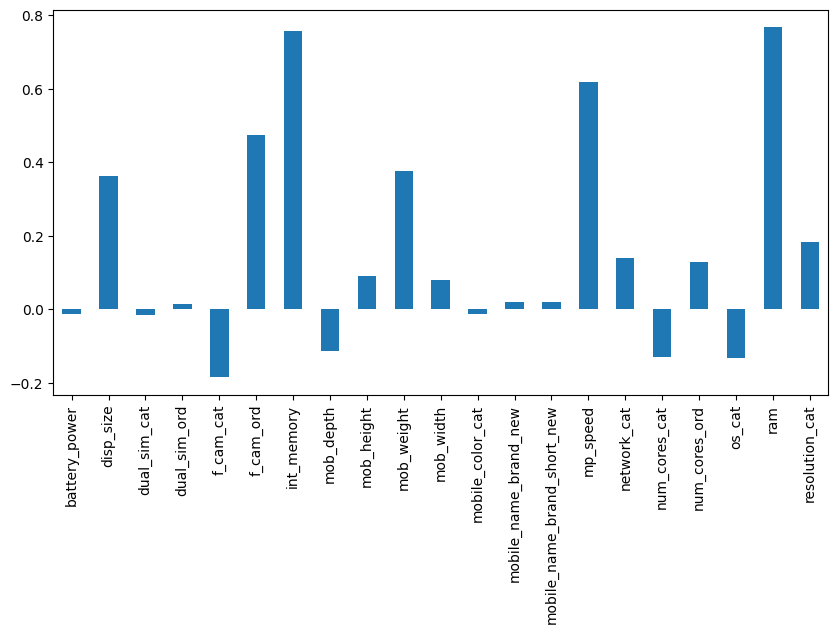

In [66]:
#More cleaning should be possible for f_cam if we represent main/overall f_cam MP as a number

df['f_cam_ord'] = replace_regex_numericize(df,'f_cam',['MP.*'])

plot_grouped_correlation_with_col(df,'mobile_price')

In [67]:
df['mob_depth'].unique()

array([ 8.95 ,  9.   ,  8.9  ,  8.7  ,  8.5  ,  8.55 ,  9.65 ,  9.6  ,
        9.4  ,  9.3  ,  8.6  ,  8.3  ,  8.8  ,  8.475,  8.1  ,  7.7  ,
        8.26 ,  7.3  ,  8.96 ,  8.05 , 92.   , 75.3  ,  8.4  ,  8.35 ,
        9.55 ,  8.47 ,  8.92 ,  8.13 ,  8.68 ,  8.28 ,  9.11 ,  8.85 ,
        8.89 ,  8.54 ,  8.21 ,  9.8  ,  7.9  ,  7.98 ,  7.77 ,  7.89 ,
        7.8  ,  7.5  , 75.   ,  7.6  ,  8.65 ,  7.95 ,  8.79 ,  9.1  ,
        8.2  ,  9.5  ,  8.67 ,  7.4  ,  7.99 ,  7.38 , 76.   ])

# Some values seem to be 92 and 75 which are outliers or out of the general range. Something has gone wrong in this data collection. So check mob height and width too for confirmation.

In [68]:
df['mob_width'].unique()

array([ 75.  ,  75.4 ,  74.2 ,  75.7 ,  74.  ,  75.16,  74.24,  74.8 ,
        75.8 ,  73.7 ,  75.6 ,  75.2 ,  75.41,  74.3 ,  76.68,  71.85,
        75.21,  75.49,  77.26,  76.4 ,  75.35,  73.6 ,   9.  ,   8.35,
        76.  ,  70.1 ,  70.4 ,  71.5 ,  75.58,  76.2 ,  76.77,  75.23,
        75.19,  75.09,  76.46,  77.33,  76.47,  75.04,  74.17,  74.71,
        74.7 ,  75.08,  77.  ,  75.03,  75.93,  72.8 ,  75.24,  75.74,
        72.9 , 159.  ,  75.3 ,  72.1 ,  69.  , 152.4 ,  76.8 ,  76.88,
        75.25,  72.85,  82.38,  76.6 ,  75.5 ,  73.3 ,  73.4 ,  76.1 ,
        77.2 ,  73.1 ,  77.35,  74.6 , 154.5 ,  73.8 ])

In [69]:
df['mob_height'].unique()

array([164.4 , 157.  , 161.  , 156.7 , 158.7 , 158.96, 162.1 , 163.9 ,
       154.3 , 163.8 , 156.1 , 156.48, 165.75, 153.48, 159.21, 151.86,
       160.73, 157.9 , 162.58, 158.58, 144.  , 175.  , 158.3 , 151.  ,
       165.5 , 140.4 , 146.3 , 147.5 , 158.73, 153.  , 159.43, 159.53,
       159.25, 155.11, 162.04, 162.39, 162.15, 159.64, 159.01, 157.25,
       159.  , 157.91, 162.  , 155.06, 154.81, 161.97, 149.3 , 155.21,
       155.87, 149.9 , 154.6 ,   9.  , 163.6 , 143.4 , 162.5 , 136.5 ,
       152.4 ,  78.6 , 165.  , 158.  , 158.25, 153.9 , 164.  , 166.38,
       156.  , 155.5 , 165.3 , 155.9 , 160.2 , 158.8 , 161.3 , 160.  ,
       161.8 , 150.5 , 154.4 , 156.2 , 157.6 , 154.5 ,   7.38, 148.1 ,
       153.3 ])

# Looks like the mobile dimensions were retrieved from some string and the order of height, weight, depth was not the same everywhere. Sort it to get it right

In [70]:
for rownum, row in df.iterrows():
    ordered_dim = sorted([row['mob_depth'],row['mob_width'],row['mob_height']])
    df.at[rownum,'mob_depth_rearr'] = ordered_dim[0]
    df.at[rownum,'mob_width_rearr'] = ordered_dim[1]
    df.at[rownum,'mob_height_rearr'] = ordered_dim[2]

df['mob_height_rearr'].unique()

array([164.4 , 157.  , 161.  , 156.7 , 158.7 , 158.96, 162.1 , 163.9 ,
       154.3 , 163.8 , 156.1 , 156.48, 165.75, 153.48, 159.21, 151.86,
       160.73, 157.9 , 162.58, 158.58, 144.  , 175.  , 158.3 , 151.  ,
       165.5 , 140.4 , 146.3 , 147.5 , 158.73, 153.  , 159.43, 159.53,
       159.25, 155.11, 162.04, 162.39, 162.15, 159.64, 159.01, 157.25,
       159.  , 157.91, 162.  , 155.06, 154.81, 161.97, 149.3 , 155.21,
       155.87, 149.9 , 154.6 , 163.6 , 143.4 , 162.5 , 136.5 , 152.4 ,
       165.  , 158.  , 158.25, 153.9 , 164.  , 166.38, 156.  , 155.5 ,
       165.3 , 155.9 , 160.2 , 158.8 , 161.3 , 160.  , 161.8 , 150.5 ,
       154.4 , 156.2 , 157.6 , 154.5 , 148.1 , 153.3 ])

In [71]:
df['mob_width_rearr'].unique()

array([75.  , 75.4 , 74.2 , 75.7 , 74.  , 75.16, 74.24, 74.8 , 75.8 ,
       73.7 , 75.6 , 75.2 , 75.41, 74.3 , 76.68, 71.85, 75.21, 75.49,
       77.26, 76.4 , 75.35, 73.6 , 92.  , 75.3 , 76.  , 70.1 , 70.4 ,
       71.5 , 75.58, 76.2 , 76.77, 75.23, 75.19, 75.09, 76.46, 77.33,
       76.47, 75.04, 74.17, 74.71, 74.7 , 75.08, 77.  , 75.03, 75.93,
       72.8 , 75.24, 75.74, 72.9 , 72.1 , 69.  , 78.6 , 76.8 , 76.88,
       75.25, 72.85, 82.38, 76.6 , 75.5 , 73.3 , 73.4 , 76.1 , 77.2 ,
       73.1 , 77.35, 74.6 , 73.8 ])

In [72]:
df['mob_depth_rearr'].unique()

array([8.95 , 9.   , 8.9  , 8.7  , 8.5  , 8.55 , 9.65 , 9.6  , 9.4  ,
       9.3  , 8.6  , 8.3  , 8.8  , 8.475, 8.1  , 7.7  , 8.26 , 7.3  ,
       8.96 , 8.05 , 8.35 , 8.4  , 9.55 , 8.47 , 8.92 , 8.13 , 8.68 ,
       8.28 , 9.11 , 8.85 , 8.89 , 8.54 , 8.21 , 9.8  , 7.9  , 7.98 ,
       7.77 , 7.89 , 7.8  , 7.5  , 7.6  , 8.65 , 7.95 , 8.79 , 9.1  ,
       8.2  , 9.5  , 8.67 , 7.4  , 7.99 , 7.38 ])

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\73056391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


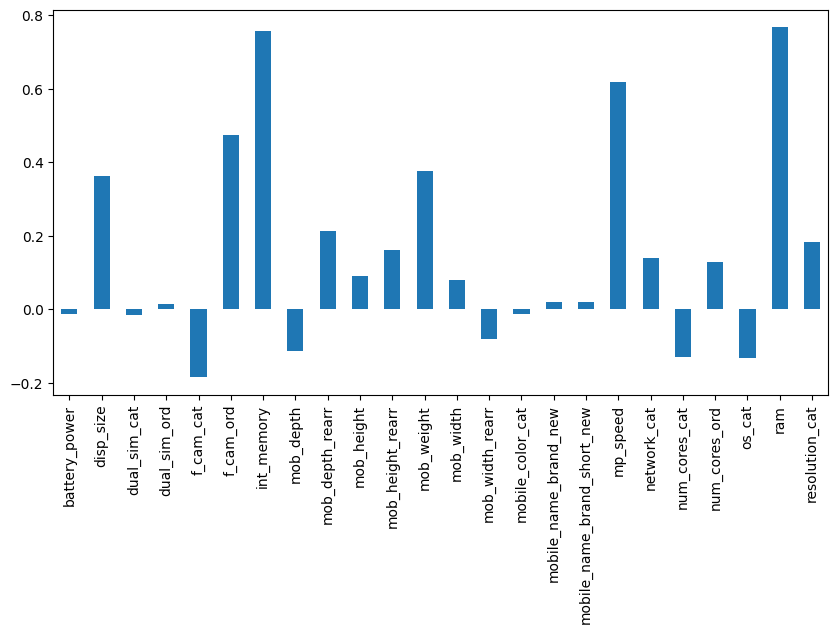

In [73]:
plot_grouped_correlation_with_col(df,'mobile_price')

In [74]:
df['mob_weight'].unique()

array([195. , 199. , 184. , 174. , 183. , 207. , 191. , 166. , 198. ,
       182. , 202. , 175. , 188. , 209. , 173.8, 186. , 185. , 168. ,
       181. , 145. , 190. , 165. , 137. , 146. , 180. , 154. , 190.5,
       189.6, 186.7, 163.5, 197. , 201. , 193. , 186.5, 176. , 179. ,
       201.8, 156. , 148. , 150. , 189.5, 139. , 151. , 160. , 142. ,
       143. , 162.8, 187. , 130. , 178. , 170. , 194. , 159. , 155. ,
       208. , 172. , 192. , 215. , 189. , 169. , 158. , 153. ])

In [75]:
df['mobile_color'].unique()

array(['So White', 'So Blue', 'That Green', 'That White', 'Crystal Green',
       'Sparkling Blue', 'Lunar White', 'Neptune Blue', 'Black Sea',
       'Pearl Blue', 'Pearl White', 'Rust Red', 'Moss Green',
       'Frozen Blue', 'Comet White', 'Lightning Orange', 'Lightning Blue',
       'Diamond Black', 'Diamond Blue', 'Diamond Ruby', 'Comet Blue',
       'Diamond Sapphire', 'Crystal Red', 'Crystal Blue',
       'Crystal Purple', 'Red Brick', 'Concrete', 'Pearl Green',
       'That Blue', 'Glacier Blue', 'Arctic White', 'Dynamic Black',
       'Diamond Red', 'Radiant Blue', 'Black', 'Sapphire Blue',
       'Onyx Black', 'Flame Red', 'Aurora Blue', 'Carbon Black',
       'More Than White', 'Space Black', 'Not just Blue', 'Kind of Grey',
       'Nebula Red', 'Gold', 'Rose Gold', 'Red', 'Twilight Grey',
       'Coral Green', 'Lake Blue', 'Metallic Grey', 'Emerald Green',
       'Ruby Red', 'Interstellar Black', 'Sea Blue', 'Midnight Grey',
       'Moonlight White', 'Sky White', 'Glacier W

In [76]:
len(df['mobile_color'].unique())

165

In [77]:
df['mobile_color_basic'] = replace_regex(df,'mobile_color',['.* '])
df['mobile_color_basic'].unique()

array(['White', 'Blue', 'Green', 'Sea', 'Red', 'Orange', 'Black', 'Ruby',
       'Sapphire', 'Purple', 'Brick', 'Concrete', 'Grey', 'Gold',
       'Silver', 'white', 'gold', 'Violet', 'Wave', 'Gray', 'Brown',
       'Cyan', 'Edition', 'Greener', 'Champagne', 'Mint', 'Mist'],
      dtype=object)

In [78]:
df['mobile_color_basic_cat'] = convert_words_to_num(df,'mobile_color_basic')

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\73056391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


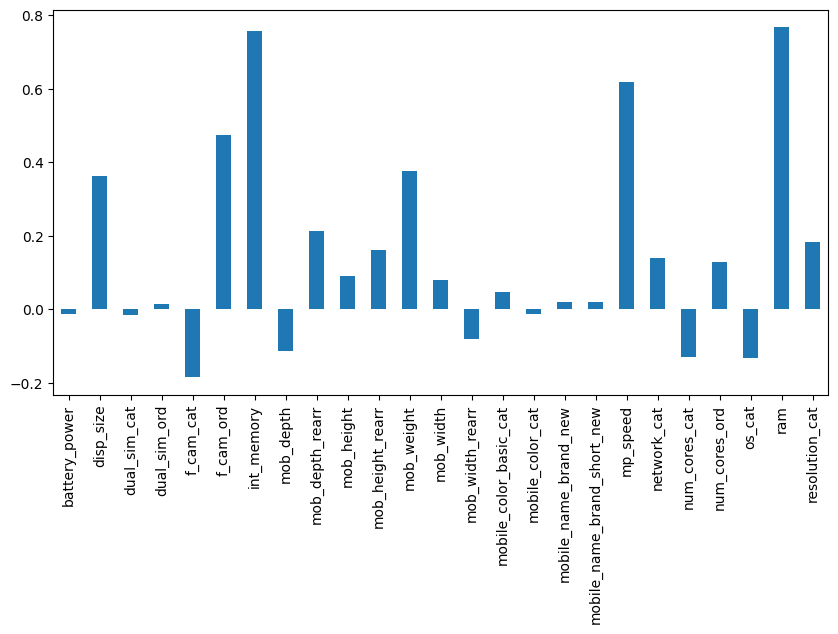

In [79]:
plot_grouped_correlation_with_col(df,'mobile_price')

In [80]:
df['mp_speed'].unique()

array([2.   , 2.3  , 2.96 , 1.95 , 2.8  , 2.05 , 2.2  , 2.1  , 2.84 ,
       2.5  , 1.8  , 1.4  , 1.5  , 1.3  , 1.6  , 2.39 , 2.6  , 2.649])

In [81]:
df['network'].unique()

array(['4G VOLTE, 4G, 3G, 2G', '3G, 4G VOLTE, 2G', '3G, 4G VOLTE, 4G, 2G',
       '3G, 4G, 2G', '4G, 2G, 3G', '5G, 4G VOLTE, 4G, 3G, 2G',
       '4G VOLTE, 3G, 2G', '4G VOLTE, 3G', '4G VOLTE, 4G, 2G, 3G',
       '4G VOLTE, 5G', '3G, 4G VOLTE, 4G', '3G', '4G VOLTE',
       '3G, 4G VOLTE', '2G', '4G, 3G, 2G', '3G, 4G', '4G VOLTE, 4G'],
      dtype=object)

In [82]:
df['network_count'] = [len(x.split(',')) for x in df['network']]
df['network_count'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\73056391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


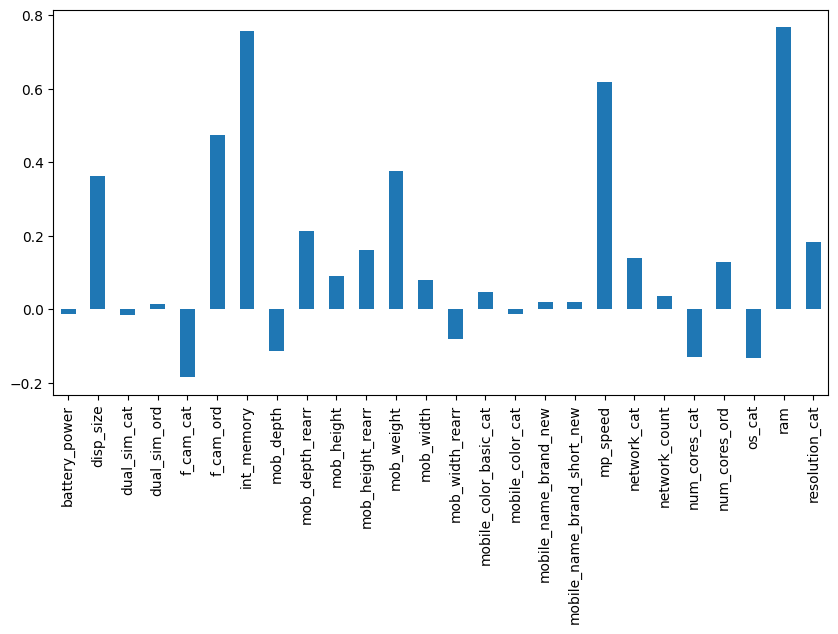

In [83]:
plot_grouped_correlation_with_col(df,'mobile_price')

<AxesSubplot: ylabel='Frequency'>

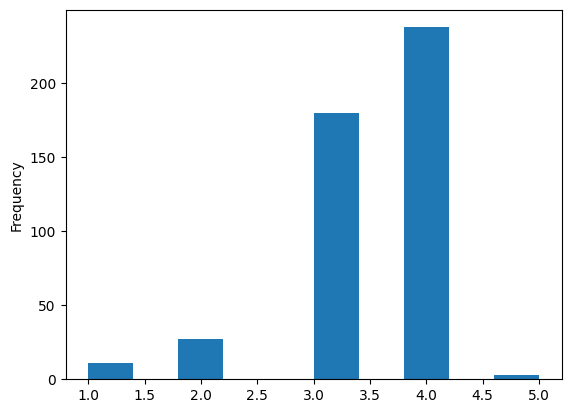

In [84]:
df['network_count'].plot(kind='hist')

In [85]:
df['os'].unique()

array(['Android 10', 'Android Pie 9.0', 'Android Pie 9',
       'Android Oreo 8.1', 'Android Pie 10', 'Android Nougat 7.1.1',
       'Android Oreo 8.0', 'Android Nougat 7.1.2', 'Android KitKat 4.4.2',
       'Android Marshmallow 6.0.1', 'Android Nougat 7.1',
       'Android Marshmallow 6', 'Android Nougat 7',
       'Android Lollipop 5.4.1', 'Android Oreo 8.1.0', 'Android Oreo 8',
       'Android Lollipop 5.1', 'Android Lollipop 5.1.1'], dtype=object)

In [86]:
df['os_version'] = replace_regex(df,'os',['[a-zA-z]* '])
df['os_version_cat'] = convert_words_to_num(df,'os_version')

df['os_version'].unique()

array(['10', '9.0', '9', '8.1', '7.1.1', '8.0', '7.1.2', '4.4.2', '6.0.1',
       '7.1', '6', '7', '5.4.1', '8.1.0', '8', '5.1', '5.1.1'],
      dtype=object)

In [87]:
df['os_version_new'] = replace_regex_numericize(df,'os_version',['\..*'])
df['os_version_new'].unique()

array([10,  9,  8,  7,  4,  6,  5], dtype=int64)

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\73056391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


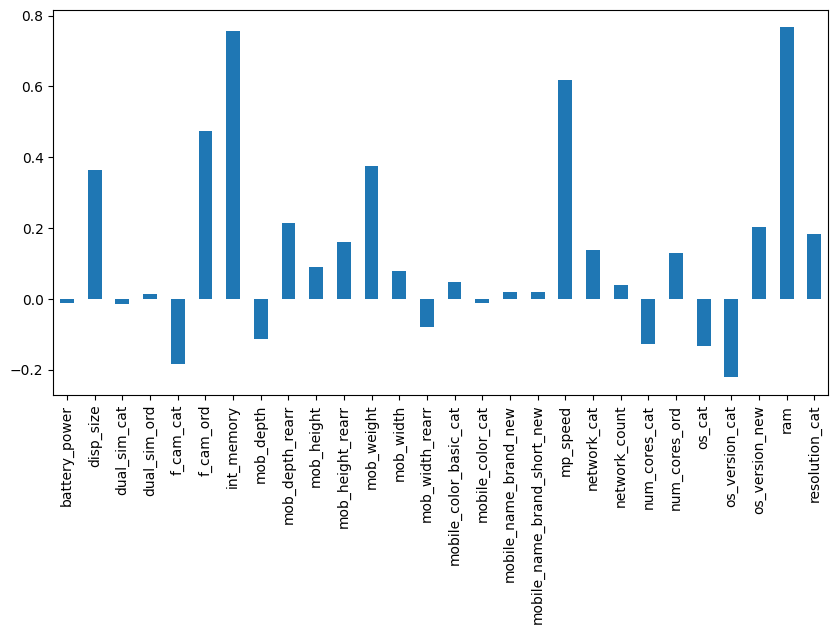

In [88]:
plot_grouped_correlation_with_col(df, 'mobile_price')

In [89]:
df['ram'].unique()

array([ 3,  4,  6,  8, 12,  2,  1], dtype=int64)

In [90]:
df['resolution'].unique()

array(['1600 x 720 Pixels', '2340 x 1080 pixels', '2400 x 1080 Pixels',
       '1080 x 2340 Pixels', '1080 x 2400 Pixels', '720 x 1600 Pixels',
       '1560 x 720 pixels', '2400 × 1080 Pixels', '1520 x 720 pixels',
       '1520 x 720 Pixels', '2400 x 1080 pixel', '1560 x 720 Pixels',
       '2160 x 1080 Pixels', '1440 x 720 pixels', '2280 x 1080 pixels',
       '2160 x 1080 pixels', '2340 x 1080 Pixel', '1920 x 1080 Pixels',
       '1520 x 720$$Pixels', '1520 x 720$$pixel', '2280 x 1080$$Pixels',
       '1920 x 1080 pixels', '2400 x 1080 Pixel', '1280 x 720 pixels',
       '2400 x 1080$$pixel', '1280 x 720 Pixels', '720 x 1544 pixels',
       '720 x 1544 Pixels', '2340 x 1080 Pixels', '2316 x 1080 pixels',
       '2280 x 1080 Pixels', '1440 x 720 Pixels', '1440 x 720 Pixel',
       '1520 x 720$$ pixels', '1520 x 720$pixels', '2340 x 1080$$pixel',
       '2340 x 1080$$Pixel', '960 x 540 Pixels', '540 x 960 Pixels',
       '1080 x 2160 pixels', '1500 x 720 pixels', '720 x 1440 Pixels',
 

In [91]:
df['res_dim'] = df['resolution'].replace('[pP]ixel.*','',regex=True).replace('\$','',regex=True).replace('[×*]',' x ',regex=True)
df['res_dim'].unique()

array(['1600 x 720 ', '2340 x 1080 ', '2400 x 1080 ', '1080 x 2340 ',
       '1080 x 2400 ', '720 x 1600 ', '1560 x 720 ', '2400  x  1080 ',
       '1520 x 720 ', '2160 x 1080 ', '1440 x 720 ', '2280 x 1080 ',
       '1920 x 1080 ', '1520 x 720', '2280 x 1080', '1280 x 720 ',
       '2400 x 1080', '720 x 1544 ', '2316 x 1080 ', '2340 x 1080',
       '960 x 540 ', '540 x 960 ', '1080 x 2160 ', '1500 x 720 ',
       '720 x 1440 ', '1080 x 1920 ', '720 x 1520 ', '720 x 1560 ',
       '720 x 1280'], dtype=object)

In [92]:
df['res_dims'] = [x.rsplit('x') for x in df['res_dim']]
df['res_dims']

0       [1600 ,  720 ]
1       [1600 ,  720 ]
2       [1600 ,  720 ]
3       [1600 ,  720 ]
4       [1600 ,  720 ]
            ...       
454     [1440 ,  720 ]
455     [1440 ,  720 ]
456    [2280 ,  1080 ]
457    [1080 ,  2340 ]
458    [1080 ,  2340 ]
Name: res_dims, Length: 459, dtype: object

In [93]:
temp_df = pd.DataFrame(df['res_dims'].to_list(), columns=['res1','res2'])
df['res_dim_1'] = pd.to_numeric(temp_df['res1'])
df['res_dim_2'] = pd.to_numeric(temp_df['res2'])

In [94]:
df['res_dim_1'].unique()

array([1600, 2340, 2400, 1080,  720, 1560, 1520, 2160, 1440, 2280, 1920,
       1280, 2316,  960,  540, 1500], dtype=int64)

In [95]:
df['res_dim_2'].unique()

array([ 720, 1080, 2340, 2400, 1600, 1544,  540,  960, 2160, 1440, 1920,
       1520, 1560, 1280], dtype=int64)

In [96]:
for rownum, row in df.iterrows():
    sorted_vals = sorted([row['res_dim_1'],row['res_dim_2']])
    df.at[rownum, 'res_dim_1'] = sorted_vals[0]
    df.at[rownum, 'res_dim_2'] = sorted_vals[1]

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\73056391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


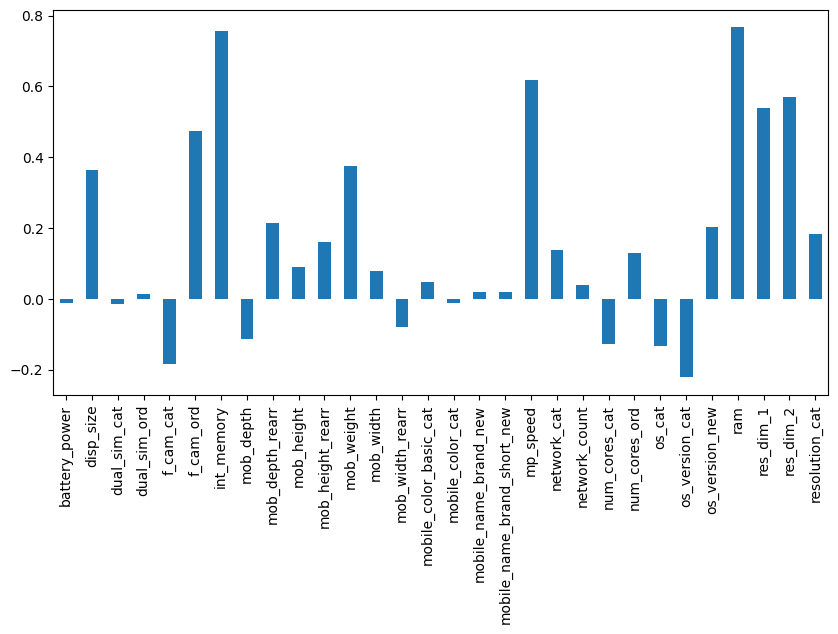

In [97]:
plot_grouped_correlation_with_col(df,'mobile_price')

In [98]:
df['resolution_new'] = df['res_dim_1']*df['res_dim_2']
df['resolution_new'].unique()

array([1152000, 2527200, 2592000, 1123200, 1094400, 2332800, 1036800,
       2462400, 2073600,  921600, 1111680, 2501280,  518400, 1080000],
      dtype=int64)

In [99]:
df['mob_screen_dimension'] = df['mob_width']*df['mob_height']
df['mob_screen_dimension'].unique()

array([12330.    , 12395.76  , 11649.4   , 12187.7   , 11595.8   ,
       11927.892 , 11801.1904, 12125.08  , 12423.62  , 11371.91  ,
       12428.64  , 11934.24  , 12416.04  , 11801.16  , 11800.1568,
       11642.81  , 12709.71  , 11027.538 , 11974.1841, 11463.9114,
       12417.9998, 12063.56  , 11965.98  , 12160.984 , 11949.003 ,
       10598.4   ,  1575.    ,  1321.805 , 11476.    , 12690.54  ,
        9842.04  , 10299.52  , 10546.25  , 11996.8134, 11658.6   ,
       12239.4411, 12001.4419, 11974.0075, 11647.2099, 12389.5784,
       12557.6187, 12399.6105, 11979.3856, 11793.7717, 11748.1475,
       11877.3   , 11855.8828, 12474.    , 11629.5   , 11615.3943,
       12298.3821, 10869.04  , 11678.0004, 11805.5938, 10927.71  ,
       11703.22  ,  1431.    , 12319.08  , 11925.    , 10339.14  ,
       12285.    ,  9418.5   , 11384.28  , 11978.64  , 12672.    ,
       11850.    , 12493.    , 11799.51  , 11908.3125, 11511.72  ,
       11146.05  , 12464.    , 13706.3844, 11700.    , 11709.1

<AxesSubplot: ylabel='Frequency'>

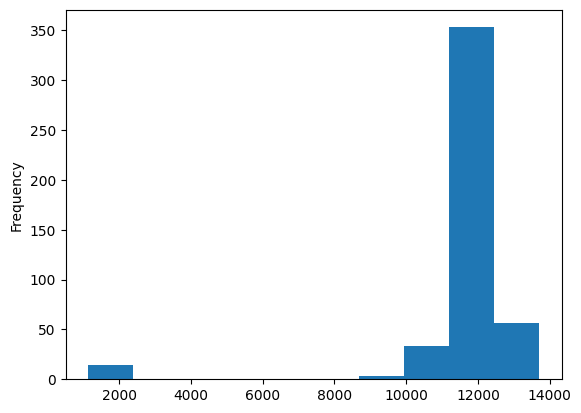

In [100]:
df['mob_screen_dimension'].plot(kind='hist')

# Once data is cleaned and compared to unprocessed data in each column for understanding the impact of processing, we can move relevant columns for final analysis and presentation

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\73056391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


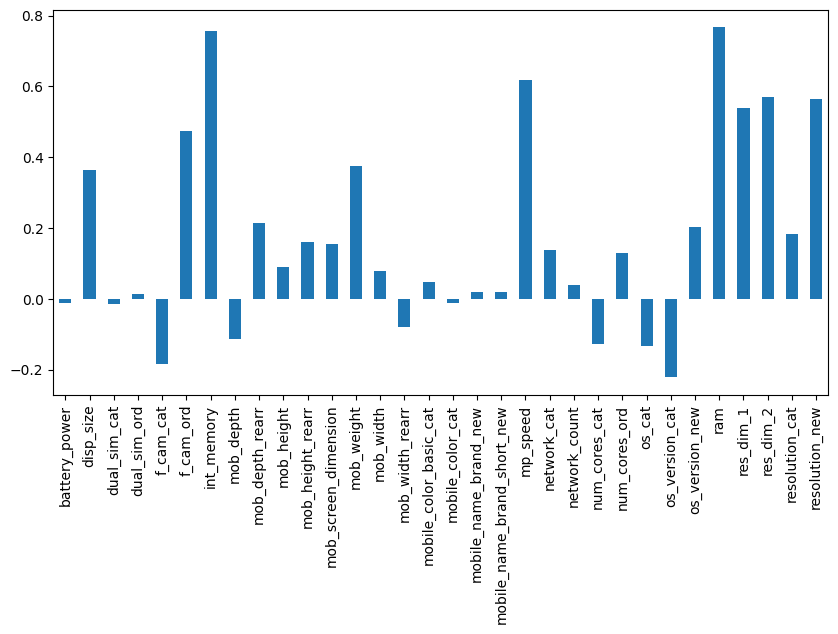

In [101]:
plot_grouped_correlation_with_col(df,'mobile_price')

In [102]:
df['p_cam'].unique()

array(['12MP + 2MP + 2MP', '48MP + 8MP + 2MP + 2MP',
       '48MP + 8MP + 2MP + 2MP Quad Camera', '64MP + 13MP + 8MP + 2MP',
       '16MP + 2MP', '64MP + 8MP + 2MP + 2MP Quad Camera',
       '64MP + 12MP + 8MP + 2MP', '12MP + 2MP', '64MP + 8MP + 2MP + 2MP',
       '13MP + 2MP', '64MP + 8MP + 8MP + 2MP', '48MP + 13MP + 8MP',
       '48MP + 8MP + 5MP + 2MP', '48MP + 8MP + 2MP', '48MP + 5MP',
       '12MP Rear Camera', '12MP + 5MP', '20MP + 12MP',
       '108MP Rear Camera', '13MP Rear Camera', '48MP + 8MP',
       '64MP + 8MP + 5MP + 2MP', '8MP Rear Camera', '13MP + 2MP + 8MP',
       '13MP + 8MP + 2MP', '13MP + 8MP + 2MP + 2MP', '16MP + 2MP + 8MP',
       '16MP + 8MP + 2MP', '48MP + 5MP + 8MP',
       '48 Million Quad Pixel Sensor (12 Million Effective Pixel) + 8MP + 5MP, AI Triple Rear Camera',
       '48MP + 13MP + 8MP + 2MP', '12MP + 5MP + 8MP', '16MP Rear Camera',
       '16MP + 5MP', '48MP + 8MP + 5MP', '64MP + 8MP + 5MP + 5MP',
       '48MP + 12MP + 5MP', '5MP Rear Camera',
      

In [103]:
df['p_cam_max'] = [x[0:2].replace('M','') for x in df['p_cam']]
df['p_cam_max'] = numericize(df,'p_cam_max')
df['p_cam_max'].unique()

array([12, 48, 64, 16, 13, 20, 10,  8,  5], dtype=int64)

In [104]:
df['p_cam_count'] = [x.count('MP') for x in df['p_cam']]
df['p_cam_count'].unique()

array([3, 4, 2, 1], dtype=int64)

In [105]:
df['f_cam'].unique()

array(['5MP Front Camera', '16MP Front Camera',
       '32MP + 8MP Dual Front Camera', '16MP + 8MP Dual Front Camera',
       '13MP Front Camera', '32MP Front Camera', '8MP Front Camera',
       '20MP Front Camera', '20MP + 2MP Dual Front Camera',
       '2MP Front Camera', '8MP Dual Front Camera', '25MP Front Camera',
       '24MP Front Camera', '13MP + 2MP Dual Front Camera',
       '44MP + 2MP Dual Front Camera'], dtype=object)

In [106]:
df['f_cam_max'] = [x[0:2].replace('M','') for x in df['f_cam']]
df['f_cam_max'].unique()

array(['5', '16', '32', '13', '8', '20', '2', '25', '24', '44'],
      dtype=object)

In [107]:
df['f_cam_max'] = numericize(df,'f_cam_max')
df['f_cam_max'].unique()

array([ 5, 16, 32, 13,  8, 20,  2, 25, 24, 44], dtype=int64)

In [108]:
df['f_cam_count'] = [x.count('MP') for x in df['f_cam']]
df['f_cam_count'].unique()

array([1, 2], dtype=int64)

In [109]:
df['f_cam_max'].equals(df['f_cam_ord'])

True

In [110]:
df.drop('f_cam_ord',axis=1, inplace=True)

C:\Users\vmraj\AppData\Local\Temp\ipykernel_12524\73056391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_corr = df.corr().sort_values(col)[col][:-1]


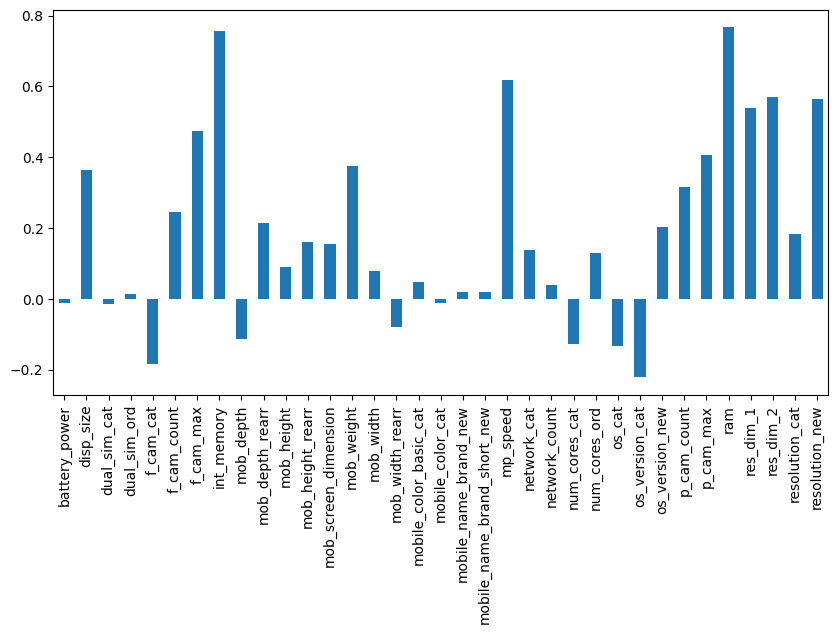

In [111]:
plot_grouped_correlation_with_col(df,'mobile_price')

In [112]:
final_df = df[['battery_power','disp_size','dual_sim_ord','f_cam_max','f_cam_count','p_cam_max','p_cam_count','int_memory','mob_depth_rearr','mob_height_rearr','mob_width_rearr','mob_weight', 'mobile_color_basic_cat','mobile_name_brand_short_new','mp_speed','network_count','num_cores_ord','os_version_new','ram','res_dim_1','res_dim_2','mobile_price']]

In [116]:
cols=['Battery Power','Display Size','Sim count','Front camera max MP','Front camera count','Primary camera max MP','Primary camera count','Internal Memory','Mobile Depth','Mobile Height','Mobile Width','Mobile Weight', 'Mobile Color','Mobile Brand','Processor Speed','Networks','Core','OS','Ram','Resolution x','Resolution y','Mobile Price']

In [119]:
old_cols = ['battery_power','disp_size','dual_sim_ord','f_cam_max','f_cam_count','p_cam_max','p_cam_count','int_memory','mob_depth_rearr','mob_height_rearr','mob_width_rearr','mob_weight', 'mobile_color_basic_cat','mobile_name_brand_short_new','mp_speed','network_count','num_cores_ord','os_version_new','ram','res_dim_1','res_dim_2','mobile_price']

In [121]:
col_mapping = dict(zip(old_cols,cols))

In [122]:
final_df = final_df.rename(columns=col_mapping)
final_df

,Battery Power,Display Size,Sim count,Front camera max MP,Front camera count,Primary camera max MP,Primary camera count,Internal Memory,Mobile Depth,Mobile Height,...,Mobile Color,Mobile Brand,Processor Speed,Networks,Core,OS,Ram,Resolution x,Resolution y,Mobile Price
0,5000,16.56,2,5,1,12,3,32,8.95,164.4,...,24,58,2.0,4,8,10,3,720,1600,8999
1,5000,16.56,2,5,1,12,3,32,8.95,164.4,...,1,58,2.0,4,8,10,3,720,1600,8999
2,5000,16.56,2,5,1,12,3,64,8.95,164.4,...,1,58,2.0,4,8,10,4,720,1600,9999
3,5000,16.56,2,5,1,12,3,64,8.95,164.4,...,24,58,2.0,4,8,10,4,720,1600,9999
4,5000,16.51,2,16,1,48,4,128,9.00,164.4,...,10,57,2.0,4,8,10,4,720,1600,11999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,3180,14.48,2,8,1,13,1,32,7.70,150.5,...,0,28,2.5,3,8,7,3,720,1440,13490
455,3180,14.48,2,8,1,13,1,16,7.70,150.5,...,17,28,2.5,4,8,7,2,720,1440,9490
456,3400,15.82,2,25,1,16,1,64,7.80,156.0,...,17,35,2.0,3,8,8,4,1080,2280,22990
457,4020,16.59,2,16,1,48,2,128,8.30,162.0,...,10,30,2.1,4,8,9,4,1080,2340,13990


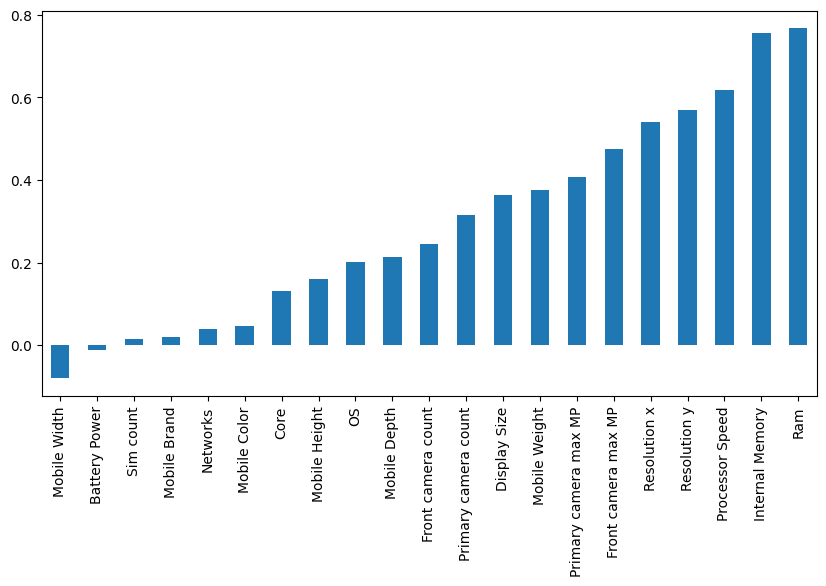

In [123]:
plot_correlation_with_col(final_df,'Mobile Price')

In [130]:
final_df.head()

,Battery Power,Display Size,Sim count,Front camera max MP,Front camera count,Primary camera max MP,Primary camera count,Internal Memory,Mobile Depth,Mobile Height,...,Mobile Color,Mobile Brand,Processor Speed,Networks,Core,OS,Ram,Resolution x,Resolution y,Mobile Price
0,5000,16.56,2,5,1,12,3,32,8.95,164.4,...,24,58,2.0,4,8,10,3,720,1600,8999
1,5000,16.56,2,5,1,12,3,32,8.95,164.4,...,1,58,2.0,4,8,10,3,720,1600,8999
2,5000,16.56,2,5,1,12,3,64,8.95,164.4,...,1,58,2.0,4,8,10,4,720,1600,9999
3,5000,16.56,2,5,1,12,3,64,8.95,164.4,...,24,58,2.0,4,8,10,4,720,1600,9999
4,5000,16.51,2,16,1,48,4,128,9.00,164.4,...,10,57,2.0,4,8,10,4,720,1600,11999


In [133]:
columns = final_df.columns.tolist()
columns.remove('Mobile Price')

feature_data = final_df[columns]
target_data = final_df['Mobile Price']

In [135]:
# Seperating input features and target variable 

X = feature_data
y = target_data

In [136]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=7)

In [137]:
# Linear Regression Model

model = LinearRegression()

# Fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [138]:
# Model Evaluation

y_train_predict = model.predict(X_train)
train_rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
train_r2 = r2_score(y_train,y_train_predict)

print('Training RMSE  :', train_rmse)
print('Training R2 : ', train_r2)

y_test_predict = model.predict(X_test)
test_rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
test_r2 = r2_score(y_test,y_test_predict)

print('Testing RMSE  :', test_rmse)
print('Testing R2 : ', test_r2)

Training RMSE  : 4414.076158212078
Training R2 :  0.7628627929761888
Testing RMSE  : 4481.839185360087
Testing R2 :  0.5788960001192236
